In [2]:
import pandas as pd
import numpy as np

In [3]:
rats=[20382,24101,21012,22295,20630,22098,23783,24116]
path="../data_gen/"
df = pd.DataFrame()

In [4]:
for i in range(len(rats)):
    ratid=rats[i]
    data=pd.read_json(path+"Rat_"+str(ratid)+"_resrel_data.json",orient="records")
    #print(data.columns)
    data['LOC']=data['LOC'].apply(lambda x: x[-1])
    data['PInfo']=data['PInfo'].apply(lambda x: x['content'])
    data['HInfo']=data['HInfo'].apply(lambda x: x['content'])

    data['poss_PInfo']=data['poss_PInfo'].apply(lambda x: x['content'])
    data['poss_HInfo']=data['poss_HInfo'].apply(lambda x: x['content'])

    # Grouping and calculating mean or sum for specified columns based on group size
    grouped_df = data.groupby('NeuID')
    columns_to_mean = ['Nspikes', 'MSR', 'MHK','dt_MHK', 'OHK', 'OHS', 'dt_OHK', 'max_HSHK', 'PInfo', 'HInfo','poss_MSR', 'poss_MHK', 'poss_dt_MHK', 'poss_OHK', 'poss_OHS','poss_dt_OHK', 'poss_max_HSHK', 'poss_PInfo', 'poss_HInfo']
    tmp_df = pd.DataFrame()
    for name, group in grouped_df:
        if len(group) > 1:
            result_values = group[columns_to_mean].mean()
        else:
            result_values = group[columns_to_mean].sum()
        tmp_df = pd.concat([tmp_df, result_values.to_frame(name=name).T])
    tmp_df['RatID'] = tmp_df.index.map(data.drop_duplicates('NeuID').set_index('NeuID')['RAT_ID'])
    tmp_df['LOC'] = tmp_df.index.map(data.drop_duplicates('NeuID').set_index('NeuID')['LOC'])
    tmp_df['task'] = tmp_df.index.map(data.drop_duplicates('NeuID').set_index('NeuID')['task'])
    columns = tmp_df.columns.tolist()
    tmp_df=tmp_df[ columns[-3:] + columns[:-3]]
    tmp_df.reset_index(inplace=True)
    tmp_df.rename(columns={'index': 'NeuID'}, inplace=True)
    #print(df.columns)
    df = pd.concat([df,tmp_df], ignore_index=True)


In [5]:
df.columns

Index(['NeuID', 'RatID', 'LOC', 'task', 'Nspikes', 'MSR', 'MHK', 'dt_MHK',
       'OHK', 'OHS', 'dt_OHK', 'max_HSHK', 'PInfo', 'HInfo', 'poss_MSR',
       'poss_MHK', 'poss_dt_MHK', 'poss_OHK', 'poss_OHS', 'poss_dt_OHK',
       'poss_max_HSHK', 'poss_PInfo', 'poss_HInfo'],
      dtype='object')

In [6]:
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 22})
mss=120

Number of spikes-0, poss_MSR_opt-1,MSR-2,MHK-6,OHK-4,OHS-3,OHK+OHS-5

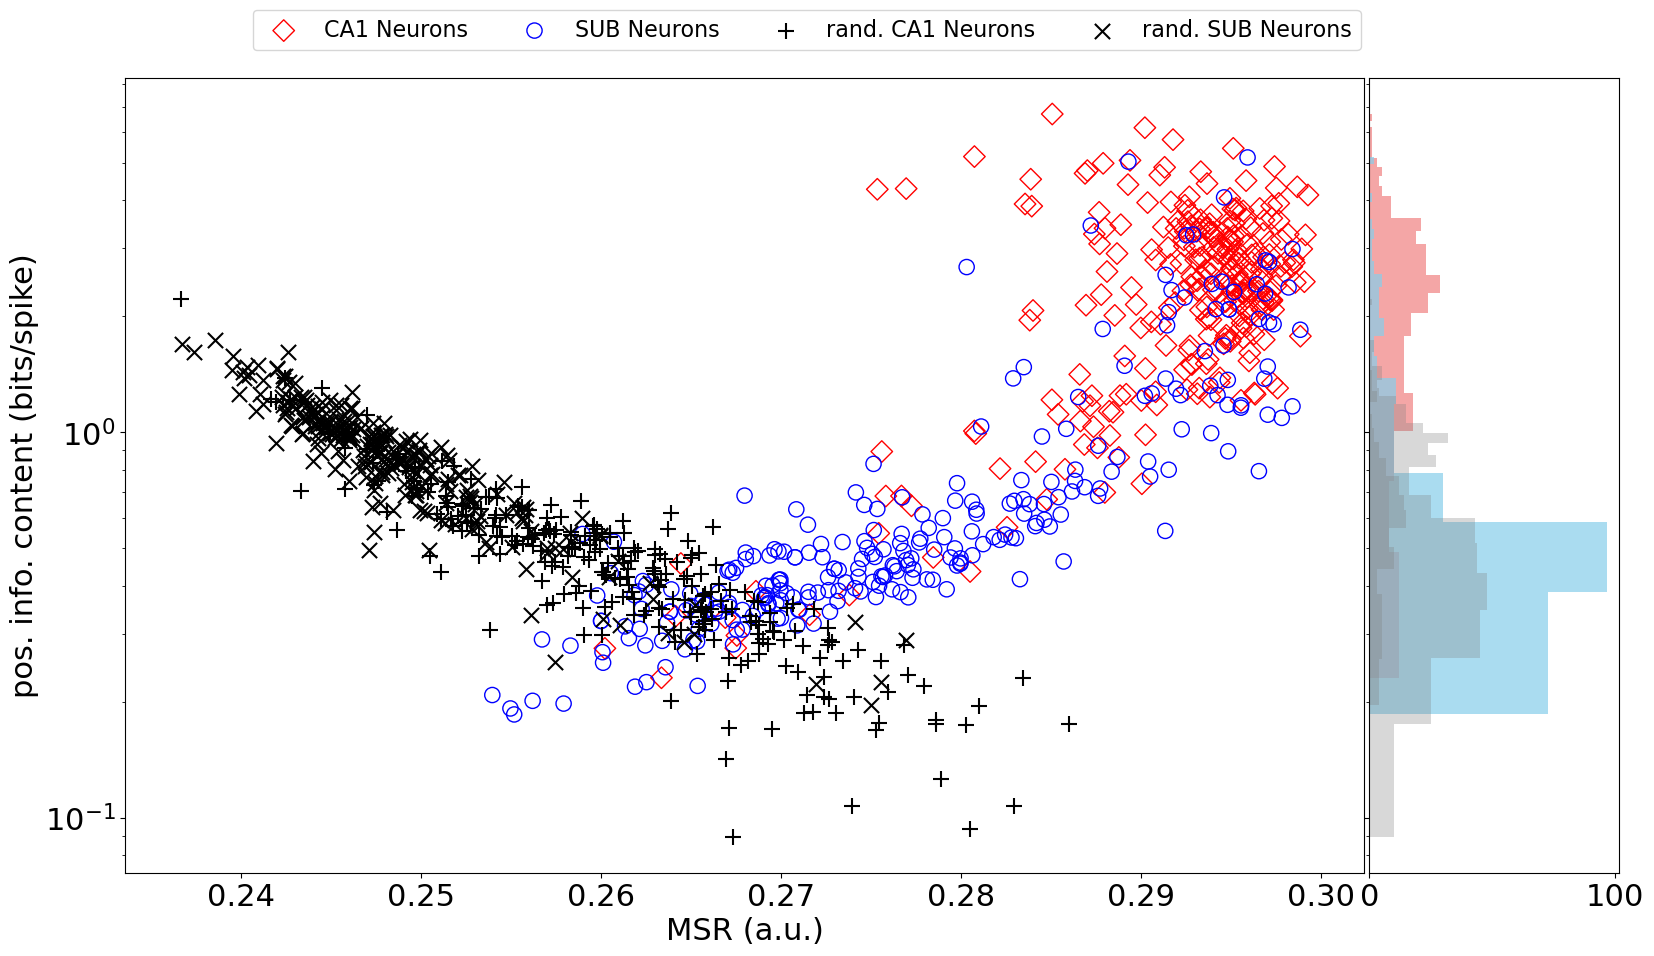

In [26]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(17, 10))

quantX='MSR'
quantX_lab='MSR (a.u.)'

quantY='PInfo'
quantY_lab='pos. info. content (bits/spike)'

figname='../figures/Fig2A.png'
figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2A.png'

#msr1F = interpolate.interp1d(np.log(optimal[:,0]), optimal[:,5],fill_value="extrapolate")
#msr2F = interpolate.interp1d(np.log(optimal[:,0]), optimal[:,1],fill_value="extrapolate")

# Scatter plot for 'quant' data
ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
# Scatter plot for 'poss_MSR' data
ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='+', color='k',s=mss)
ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='x',color='k',s=mss)
# #Line plot for optimal MSR
#ax.plot(df['Nspikes'].sort_values(), msr1F(np.log(np.array(df['Nspikes'].sort_values()))),'-.',color='tab:orange', linewidth=2,label='optimal')
#ax.plot(df['Nspikes'].sort_values(), msr2F(np.log(np.array(df['Nspikes'].sort_values()))),'--',color='tab:brown', linewidth=2,label='rand. optimal')

# Create Marginal plot on the right-hand side
divider = make_axes_locatable(ax)
# Plot histogram on the right (for both sets of data)
ax_histy = divider.append_axes("right", 2.5, pad=0.05, sharey=ax)  # Adjusted pad value
# Remove y-axis label on the Marginal plot
ax_histy.tick_params(axis="y", labelleft=False)

# Plot histogram for 'quant' data
bins = 25
ax_histy.hist(df.query('LOC=="CA1"')[quantY], bins=bins, orientation='horizontal', color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
ax_histy.hist(df.query('LOC=="SUB"')[quantY], bins=bins, orientation='horizontal', color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')

# Plot histogram for 'poss_quant' data
ax_histy.hist(df.query('LOC=="CA1"')['poss_'+quantY], bins=bins, orientation='horizontal', color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
ax_histy.hist(df.query('LOC=="SUB"')['poss_'+quantY], bins=bins, orientation='horizontal', color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')


# Set labels and title for the main scatter plot
ax.set_xlabel(quantX_lab)
ax.set_ylabel(quantY_lab)  # Adjusted Y-axis label
ax.set_yscale('log')
# Add legend to the scatter plot
# Add legend to the scatter plot outside, on the top, with horizontal layout and single column
ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.1), ncol=6,fontsize=16)

plt.tight_layout()
plt.savefig(figname,dpi=300)
plt.savefig(figname2,dpi=300)

In [9]:
import plotly.express as px


px.scatter(data_frame=df, x='MSR', y='poss_PInfo',color='LOC', log_x=True,hover_name="NeuID", hover_data=["RatID","task"],marginal_y='histogram')

#px.scatter(data_frame=data, x='Nspikes', y=['MSR','poss_MSR'],color='LOC', log_x=True,hover_name="NeuID", hover_data=["task"],marginal_y='histogram')

In [14]:
# px.scatter(data_frame=data, x='Nspikes', y=['MSR'],color='LOC', log_x=True,hover_name="NeuID", hover_data=["task"],marginal_y='histogram')